In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
columns = train.columns

In [4]:
train.drop([columns[2], columns[7],columns[6], columns[10], columns[11], columns[12], columns[13], columns[14]], inplace=True, axis=1)

In [5]:
columns = train.columns

In [6]:
for i in columns:
    train[i].fillna(train[i].median(), inplace=True)

In [7]:
train.isnull().sum()

Unnamed: 0                                                   0
Year                                                         0
GDP (current US$)                                            0
GDP growth (annual %)                                        0
Inflation, GDP deflator (annual %)                           0
Exports of goods and services (% of GDP)                     0
Imports of goods and services (% of GDP)                     0
External debt stocks, total (DOD, current US$)               0
Foreign direct investment, net inflows (BoP, current US$)    0
Population, total                                            0
CO2 emissions (metric tons per capita)                       0
Life expectancy at birth, total (years)                      0
dtype: int64

In [8]:
for i in train.columns:
    print(train[i].dtype)

int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
float64
float64


In [9]:
column = test.columns

In [10]:
test.drop([column[2], column[7],column[6], column[10], column[11], column[12], column[13], column[14]], inplace=True, axis=1)

In [11]:
column = test.columns

In [12]:
test[column[10]].fillna(0.565865, inplace=True)  

In [13]:
test.isnull().sum()

Unnamed: 0                                                   0
Year                                                         0
GDP (current US$)                                            0
GDP growth (annual %)                                        0
Inflation, GDP deflator (annual %)                           0
Exports of goods and services (% of GDP)                     0
Imports of goods and services (% of GDP)                     0
External debt stocks, total (DOD, current US$)               0
Foreign direct investment, net inflows (BoP, current US$)    0
Population, total                                            0
CO2 emissions (metric tons per capita)                       0
dtype: int64

In [14]:
test = test.replace('..',13.45)

In [15]:
test

,Unnamed: 0,Year,GDP (current US$),GDP growth (annual %),"Inflation, GDP deflator (annual %)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"External debt stocks, total (DOD, current US$)","Foreign direct investment, net inflows (BoP, current US$)","Population, total",CO2 emissions (metric tons per capita)
0,0,1990,5.403580e+10,11.776886,6.668942,20.97477285,9.949967231,33458483418,587882970.6,95212450,0.411675
1,1,1991,4.911843e+10,0.358353,18.863907,24.24686728,12.77473759,33526931287,712373362.5,97667632,0.432827
2,2,1992,4.779493e+10,4.631193,46.752355,23.9747503,14.25263801,29018663728,896641282.5,100161710,0.465396
3,3,1993,2.775220e+10,-2.035119,41.639059,20.06653995,13.65321498,30699263746,1345368587,102700753,0.439501
4,4,1994,3.383304e+10,-1.814924,43.296464,13.54924651,9.509989939,33092276818,1959219858,105293700,0.334299
5,5,1995,4.406247e+10,-0.072665,75.401653,24.15581596,15.37256245,34094439060,335842165,107948335,0.312014
6,6,1996,5.107582e+10,4.195924,26.491090,23.02469951,17.23302974,31414754639,499276809.5,110668794,0.334795
7,7,1997,5.445784e+10,2.937099,5.055346,28.64975397,22.81125683,28467535604,469577019.8,113457663,0.363799
8,8,1998,5.460405e+10,2.581254,6.009344,18.1440897,21.13451777,30313714708,299566658.3,116319759,0.326916
9,9,1999,5.937261e+10,0.584127,13.430572,21.33433128,13.1234999,29095550937,1004915631,119260063,0.334168


In [16]:
for i in test.columns:
    print(test[i].dtype)

int64
int64
float64
float64
float64
object
object
object
object
int64
float64


In [17]:
test[column[-3]].dtype

dtype('O')

In [18]:
test[column[-3]] = test[column[-3]].astype('float')
test[column[-4]] = test[column[-4]].astype('float')
test[column[-5]] = test[column[-5]].astype('float')
test[column[-6]] = test[column[-6]].astype('float')

In [19]:
for i in test.columns:
    print(test[i].dtype)

int64
int64
float64
float64
float64
float64
float64
float64
float64
int64
float64


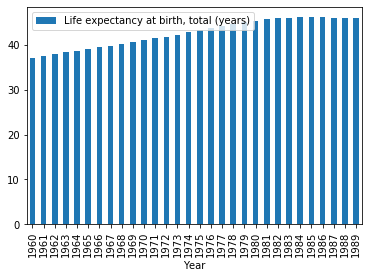

In [20]:
p=pd.pivot_table(data=train,index=columns[1],values= columns[-1],aggfunc=np.median)
p.plot(kind='bar')

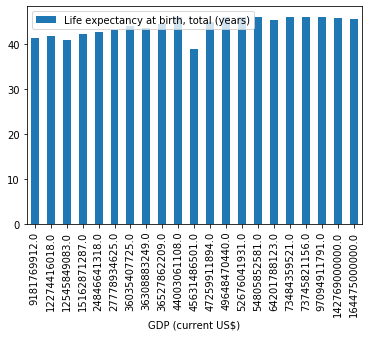

In [21]:
p=pd.pivot_table(data=train,index=columns[2],values= columns[-1],aggfunc=np.median)
p.plot(kind='bar')

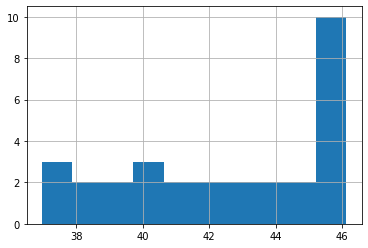

In [22]:
train[columns[-1]].hist()

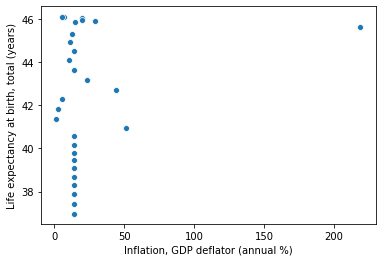

In [23]:
sns.scatterplot(data=train, y=columns[-1], x=columns[4])

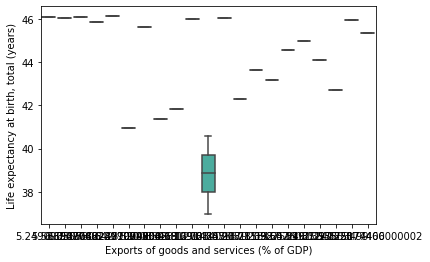

In [24]:
sns.boxplot(data=train,x=columns[5] ,y=columns[-1])

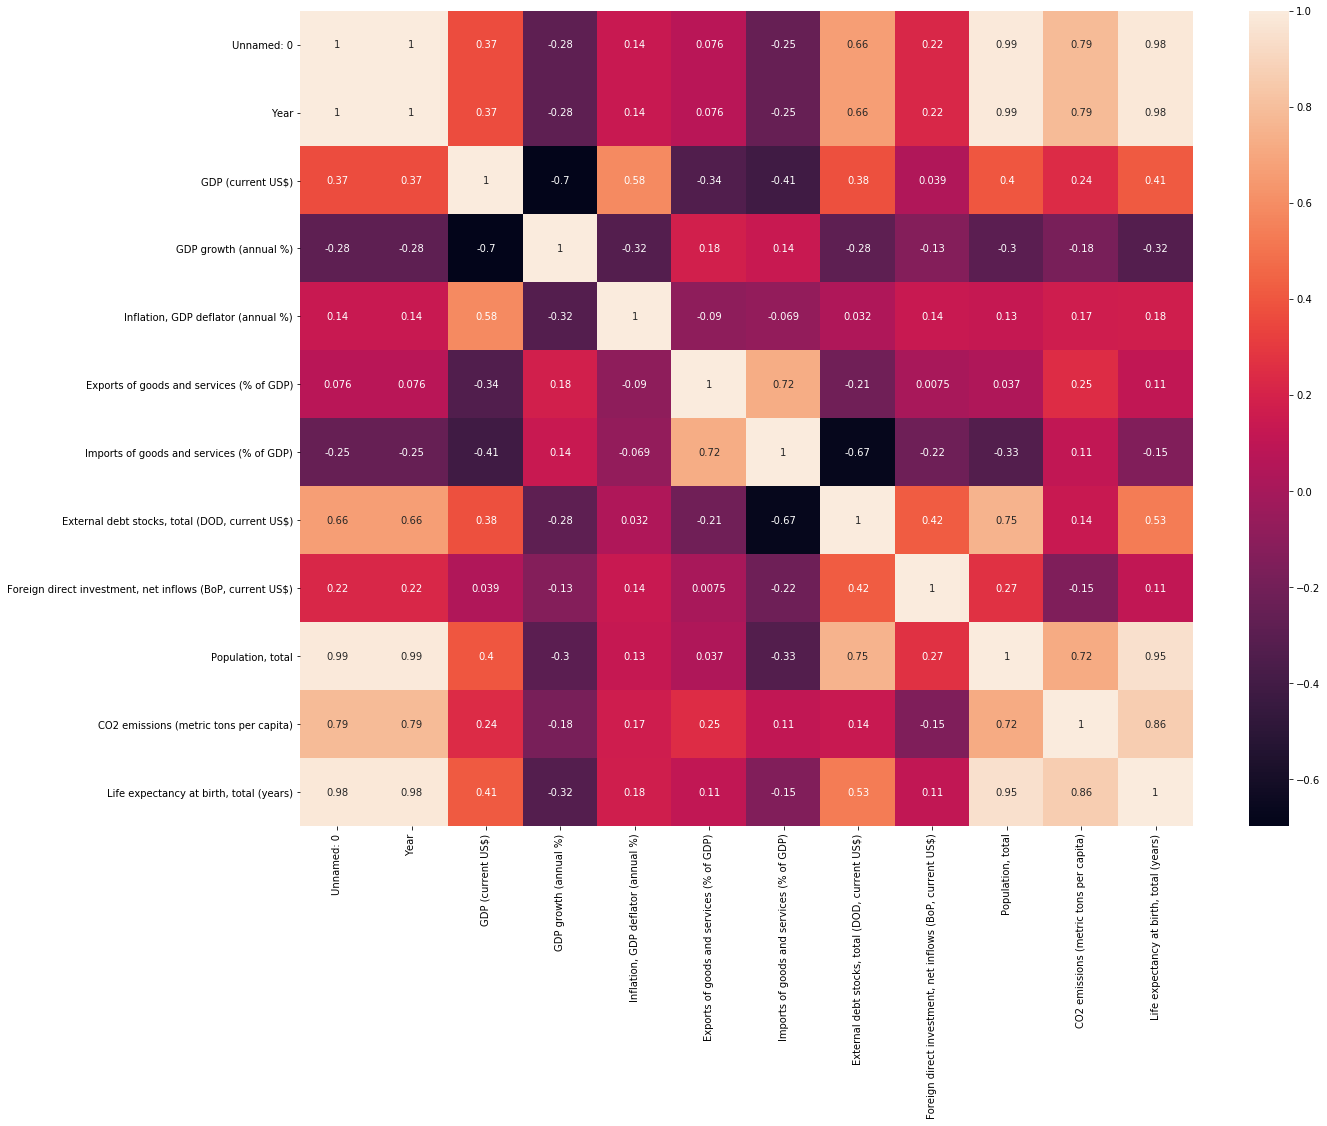

In [25]:
plt.figure(figsize=(20, 15)) 
sns.heatmap(train.corr(), annot=True)

In [26]:
y = train['Life expectancy at birth, total (years)']
X = train.drop('Life expectancy at birth, total (years)',axis=1)

In [46]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=2)
abr = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=2)
val=abr.fit(train_X,train_y)
accuracy = abr.score(test_X, test_y)
accuracy

0.9616849543618314

In [28]:
prediction = abr.predict(test)

In [29]:
prediction

array([45.333     , 45.333     , 45.333     , 44.547     , 44.547     ,
       45.333     , 45.333     , 44.104     , 44.25166667, 45.333     ,
       45.333     , 44.25166667, 45.333     , 44.25166667, 45.939     ,
       45.9956    , 45.333     , 45.829     , 45.903     , 45.9696    ,
       45.9788    , 45.828     , 46.00188889, 46.01966667, 46.017125  ,
       46.02483333, 46.03333333, 46.017125  , 46.00188889, 45.903     ])

In [37]:
submission = pd.DataFrame(test['Year'])
submission['Life_Expectancy'] = prediction

In [38]:
submission.to_csv('subExpectancy.csv',index=False)

In [39]:
test['Year']

0     1990
1     1991
2     1992
3     1993
4     1994
5     1995
6     1996
7     1997
8     1998
9     1999
10    2000
11    2001
12    2002
13    2003
14    2004
15    2005
16    2006
17    2007
18    2008
19    2009
20    2010
21    2011
22    2012
23    2013
24    2014
25    2015
26    2016
27    2017
28    2018
29    2019
Name: Year, dtype: int64

In [40]:
submission

,Year,Life_Expectancy
0,1990,45.333000
1,1991,45.333000
2,1992,45.333000
3,1993,44.547000
4,1994,44.547000
5,1995,45.333000
6,1996,45.333000
7,1997,44.104000
8,1998,44.251667
9,1999,45.333000


In [41]:
sub= pd.read_csv('sample_submission.csv')

In [36]:
sub.head()

,Year,Life_Expectancy
0,1990,20.03
1,1991,20.03
2,1992,20.03
3,1993,20.03
4,1994,20.03


In [44]:
mse

0.0